In [1]:
from __future__ import print_function
from shapely.ops import cascaded_union
import geopandas as gpd
import descartes
import shapely.geometry as shy
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import FloatSlider
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import random
import igl
import math
import tripy
import networkx as nx
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
from matplotlib.pyplot import figure
colors= np.array(['#85C17E','#E2BC74','#425B8A','#B666D2','#9393b3','#85C17E','#E2BC74','#425B8A','#B666D2','#85C17E' ,'#85C17E','#E2BC74','#425B8A','#B666D2','#85C17E' ,'#85C17E','#E2BC74','#425B8A','#B666D2','#85C17E' ,'#85C17E','#E2BC74','#425B8A','#B666D2','#85C17E' ,'#85C17E','#E2BC74','#425B8A','#B666D2','#85C17E' ,'#85C17E','#E2BC74','#425B8A','#B666D2','#85C17E' ,'#85C17E','#E2BC74','#425B8A','#B666D2','#85C17E' ,'#85C17E','#E2BC74','#425B8A','#B666D2','#85C17E' ,'#85C17E','#E2BC74','#425B8A','#B666D2','#85C17E'   ])
colors = np.array(['#FFF8DC', '#FFEBCD','#FFE4C4','#FFDEAD','#F5DEB3','#DEB887','#D2B48C','#BC8F8F','#F4A460','#DAA520','#B8860B','#CD853F','#D2691E','#8B4513','#A52A2A','#800000'])
colors = np.array(['#FFE4C4','#BC8F8F','#CD853F','#D2691E','#8B4513','#A52A2A','#CD853F','#CD853F','#CD853F','#CD853F','#CD853F','#CD853F','#CD853F','#CD853F','#CD853F','#CD853F','#CD853F','#CD853F','#CD853F','#CD853F'])

#colors = np.array(['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000'])
import copy
from numpy import linalg as LA
epsilon=1e-5
from shapely.geometry import Point, MultiPoint

# part triangulation Functions

            

In [2]:
def triangulate(figure):
    result = np.array([tripy.earclip(figure[i]) for i in range(len(figure))])
    return result
def display_triangulated_shape(triangles):
    patches = []
    xmax=0
    ymax=0
    fig = plt.figure(num=None, figsize=(8, 8))
    ax = fig.gca()
    for i in range(len(triangles)):
        polygon = Polygon(triangles[i], fill=True,edgecolor='black',label='figure'+str(i))
        ax.add_artist(polygon)
    ax.set(xlim=(0, 1000), ylim=(0, 600))
    plt.show()
    


# parts display function

In [51]:

def displayPolygonsStable(figure, v, k=0, image = None, l= 0): 
    clone = copy.deepcopy(figure)
    def update(m=0, size= l):
        patches = []
        center = (0,0)
        margin = 1000
        xmax=center[0]+margin
        ymax=center[1]+margin
        xmin = center[0]-margin
        ymin=center[1]-margin
        k=0
        fig2 = plt.figure(num=None, figsize=(8, 8))
        ax2 = fig2.gca()
        if(v.size>0):
            for k in range(len(figure)):
                for l in range(len(figure[k])):
                    clone[k][l][0]=figure[k][l][0] + m * v[2*k] 
                    clone[k][l][1]=figure[k][l][1] + m * v[2*k+1]

        for i in range(len(figure)):
            
            if(image == None):
                polygon = Polygon(clone[i], fill=True, facecolor=colors[i],edgecolor='black',label='figure'+str(i))
                ax2.add_artist(polygon)
            else:
                newIm = Image.open("images/"+str(image)+"out"+str(i)+".png")
                newIm = translateImg(newIm, -m * v[2*i] ,-m * v[2*i+1] )

                h = ax2.imshow(newIm)  

        ax2.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
            

    interact(update,m=FloatSlider(min=0, max=1, step=0.05))
    

def displayPolygons(figure, v, k=0): 
    clone = copy.deepcopy(figure)
    def update(i=0):
        patches = []
        xmax=0
        ymax=0
        xmin =0
        ymin=0
        k=0
        fig2 = plt.figure(num=None, figsize=(8, 8))
        ax2 = fig2.gca()
        if(v.size>0):
            for k in range(len(figure)):
                for l in range(len(figure[k])):
                    clone[k][l][0]=figure[k][l][0] + i * v[2*k] 
                    clone[k][l][1]=figure[k][l][1] + i * v[2*k+1]

        for i in range(len(figure)):
            polygon = Polygon(clone[i], fill=True, facecolor=colors[i],edgecolor='black',label='figure'+str(i))
            ax2.add_artist(polygon)
            if(xmax<np.max(clone[i][:,0])):
                xmax=np.max(clone[i][:,0])
            if(ymax<np.max(clone[i][:,1])):
                ymax=np.max(clone[i][:,1])
            if(xmin>np.min(clone[i][:,0])):
                xmin=np.min(clone[i][:,0])
            if(ymin>np.min(clone[i][:,1])):
                ymin=np.min(clone[i][:,1])
        ax2.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
            

    interact(update,i=FloatSlider(min=0, max=10, step=0.1))
def simpleDisplay(figure):
    patches = []
    xmax=0
    ymax=0
    xmin =0
    ymin=0
    k=0
    fig2 = plt.figure(num=None, figsize=(8, 8))
    ax2 = fig2.gca()
    for i in range(len(figure)):
        polygon = Polygon(figure[i], fill=True, facecolor=colors[i],edgecolor='black',label='figure'+str(i))
        ax2.add_artist(polygon)
        if(xmax<np.max(figure[i][:,0])):
            xmax=np.max(figure[i][:,0])
        if(ymax<np.max(figure[i][:,1])):
            ymax=np.max(figure[i][:,1])
        if(xmin>np.min(figure[i][:,0])):
            xmin=np.min(figure[i][:,0])
        if(ymin>np.min(figure[i][:,1])):
            ymin=np.min(figure[i][:,1])
        ax2.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    plt.show()

# normals computing functions

In [4]:
def cross(a,b):
    return a[0]*b[1]-b[0]*a[1]

def is_between(a, b, c): # is point c between point a and b
    if(np.allclose(a,c) or np.allclose(b,c)):
        return False
    cross_product= cross((c-a),(b-a))
    if abs(cross_product) > epsilon:
        return False
    dotproduct = (b-a)@(c-a)
    if dotproduct < 0:
        return False
    squaredlengthba = np.sum(np.square(b-a))
    if dotproduct > squaredlengthba:
        return False
    return True

def isTouching(v1,v2, u1,u2):
    if((np.allclose(v1,u1) and np.allclose(v2,u2)) or  (np.allclose(v2,u1) and np.allclose(v1,u2))):
        return True
    return abs(cross(v1-v2, u1-u2)) < epsilon and (is_between(v1,v2,u1) or is_between(v1,v2,u2) or is_between(u1,u2,v1) or is_between(u1,u2,v2))  
def compute_normal_edge(v1,v2,i,j):
    normal = np.array(v2-v1)
    normal[0], normal[1] = normal[1], -normal[0]
    normal = normal / LA.norm(normal)
    return np.around(np.array(normal), decimals = 1)

def compute_normals_shape(shape):
    normals_of_shape= np.array([compute_normal_edge(shape[i],shape[(i+1)%len(shape)]) for i in range(len(shape))])
    return normals_of_shape

def compute_normals_2_shapes(shape1, shape2): 
    result = np.array([compute_normal_edge(shape1[i],shape1[(i+1)%len(shape1)],shape2[j],shape2[(j+1)%len(shape2)]) for i in range (len(shape1)) for j in range (len(shape2)) if(isTouching(shape1[i],shape1[(i+1)%len(shape1)],shape2[j],shape2[(j+1)%len(shape2)]))])   
    return set(tuple(i) for i in result)

def compute_normals_dict(figure):
    normals_dic = {}
    for i in range(len(figure)):
        for j in range(len(figure)):
            if(i != j):
                normals_dic[i,j]= compute_normals_2_shapes(figure[i], figure[j])
    return normals_dic

# inequation solver functions

In [5]:

def construct_A(figure):
    normals= compute_normals_dict(figure)
    count=0
    for x in normals: 
        count += len(normals[x]) 
    A = np.zeros((count,  len(figure)*2))
    c=0
    for x in normals:
        for j in range(len(normals[x])):
            a= list(normals[x])
            A[c][2*list(x)[0]]=-a[j][0]
            A[c][2*list(x)[0]+1]=-a[j][1]
            A[c][2*list(x)[1]]=a[j][0]
            A[c][2*list(x)[1]+1]=a[j][1]

            c=c+1
    return np.unique(A, axis=0)

def solver(A, i): #fixes all velocities except the i part to 0
    x = cp.Variable(len(A[0]))
    tij=cp.Variable(len(A))
    index=np.arange(len(A[0]))
    index= np.delete(index, 2*i)
    index= np.delete(index, 2*i)

    constraints = [(A*x-tij)>=np.zeros(len(A)), x[index]==0, tij>=0, tij<=1]

    objective =  cp.Maximize(cp.sum(tij))
    prob = cp.Problem(objective, constraints)
    result = prob.solve()
    return np.round(tij.value,decimals=3), np.round(x.value,decimals=3)

def solver_2(A, i,n, iskey=False,): #fixes only one reference part pr velocity to 0
    x = cp.Variable(len(A[0]))
    tij=cp.Variable(len(A))    
    if(iskey and n>2):
        constraints = [(A*x-tij)>=np.zeros(len(A)), x[(i+1)%len(A[0])]==0, x[i]==0, tij>=0, tij<=1]
    elif(n<=2):
        constraints = [(A*x-tij)>=np.zeros(len(A)),  tij>=0, tij<=1]
    else:
        constraints = [(A*x-tij)>=np.zeros(len(A)), x[(i+1)%len(A[0])]==0, tij>=0, tij<=1]

    objective =  cp.Maximize(cp.sum(tij))
    prob = cp.Problem(objective, constraints)
    result = prob.solve()
    return np.round(tij.value,decimals=3), np.round(x.value,decimals=3)

def solverMultipleMoving(A):
    x = cp.Variable(len(A[0]))
    tij=cp.Variable(len(A))    
    
    constraints = [(A*x-tij)>=np.zeros(len(A)), tij>=0, tij<=1]
    objective =  cp.Maximize(cp.sum(tij))
    prob = cp.Problem(objective, constraints)
    result = prob.solve()
    return np.round(tij.value,decimals=3), np.round(x.value,decimals=3)

# testing functions

In [6]:
def interlocking_test(figure, allVelocitiesFixed = True, key=None):
    A=construct_A(figure)
    final_v = np.array([])
    max_tij = np.zeros(len(A)) 
    
    for i in range(len(figure)):
        if(allVelocitiesFixed):
            temp_tij, v = solver(A, i)
        else:
            if(key is not None):
                temp_tij, v = solver_2(A, i,len(figure),True)
            else:
                temp_tij, v = solver_2(A, i,len(figure))

        if(np.sum(temp_tij) > np.sum(max_tij)):
            max_tij=temp_tij
            final_v=v
            
    return  max_tij, final_v   
def interlocking_test_moving(figure):
    A=construct_A(figure)
    final_v = np.array([])
    max_tij = np.zeros(len(A)) 
    temp_tij, v = solverMultipleMoving(A)
    if(np.sum(temp_tij) > np.sum(max_tij)):
        max_tij=temp_tij
        final_v=v

    return  max_tij, final_v   
def movingPieces(v):
    movingPieces=[]
    for i in range(len(v)//2):
        if(v[2*i]>0 or v[2*i+1]> 0):
            movingPieces.append(i)
    return movingPieces

#single piece moving function test and interactive plot
def fullStudy(figure, display = 0):
    if(display == 0):
        tij, v= interlocking_test(figure, True)
        print(v)
        if(v.size>0):
            if(len(movingPieces(v))>1):
                displayPolygons(figure, v)
                return "non interlocking, figure {} are able to move together".format(movingPieces(v))
            else:
                print("only piece "+str(movingPieces(v))+" can move, it's the key")
                displayPolygons(figure,v)
                if(v.size!=0):
                    return "it is an interlocking assembly ( deadlocking if key is fixed)"

        else:
            displayPolygons(figure,v)
            return "deadlocking"
    else:
        tij, v= interlocking_test(figure, True)
        print(v)
        if(v.size>0):
            if(len(movingPieces(v))>1):
                displayPolygonsStable(figure, v)
                return "non interlocking, figure {} are able to move together".format(movingPieces(v))
            else:
                print("only piece "+str(movingPieces(v))+" can move, it's the key")
                displayPolygonsStable(figure,v)
                tij, v = interlocking_test(figure, False, movingPieces(v)[0])
                if(v.size!=0):
                    return "it is an interlocking assembly ( deadlocking if key is fixed)"

        else:
            displayPolygonsStable(figure,v)
        
    return "deadlocking"

#Multiple Moving function test and interactive plot
def StudyMultipleMoving(figure, k=0, image = None, l=2800, recreate = False):
    if(image != None and recreate):
        createImages(figure, image, l)

    tij, v= interlocking_test_moving(figure)
    print(v)
    if(v.size>0):
            displayPolygonsStable(figure, v, k, image, l = 4000)
       
    else:
        displayPolygonsStable(figure,v, k, image, l=4000)
        return "deadlocking"
              

# figure 1 test

In [7]:
#figure 1
p1 = np.array([[0,0], [400,0], [400,100],[100,100], [100,200], [200,300], [0,300]])
p2= np.array([[400,100],[400,300],[200,300],[100,200],[100,100]])
figure1= np.array([p1,p2])
fullStudy(figure1)

[-6.242 -2.254  0.     0.   ]
only piece [] can move, it's the key


interactive(children=(FloatSlider(value=0.0, description='i', max=10.0), Output()), _dom_classes=('widget-inte…

'it is an interlocking assembly ( deadlocking if key is fixed)'

# figure 2 test

In [8]:
#figure 2
f1= np.array([[0,600],[0,200],[200,200],[100,100],[300,100],[800,600]])
f2= np.array([[0 ,0],[1000,0],[1000 , 600],[800, 600],[700 ,500],[800, 500],[700 ,400],[1000 , 400],[800 ,200],[400, 200],[300 ,100],[100 ,100],[200 ,200],[  0 ,200]])
f3= np.array([[400,200],[800,200],[1000,400],[700,400],[600,300],[500,300]])
f4= np.array([[500,300],[600,300], [800,500],[700,500]])
figure2=np.array([f1,f2,f3,f4])
fullStudy(figure2, display = 1)

[ 1.  1. -0.  0.  0. -0.  0. -0.]
only piece [0] can move, it's the key


interactive(children=(FloatSlider(value=0.0, description='m', max=1.0, step=0.05), IntSlider(value=0, descript…

'it is an interlocking assembly ( deadlocking if key is fixed)'

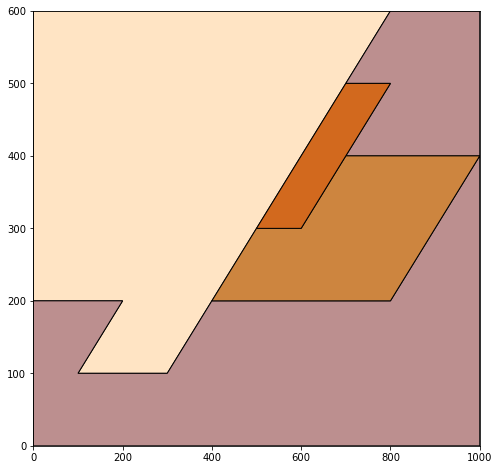

In [9]:
simpleDisplay(figure2)

# DeadLocking test

In [10]:
deadLockingPart1 = np.array([[0,0],[300,0],[300,200],[200,200],[200,100],[100,100],[100,400],[200,400],[200,300],[300,300],[300,500],[0,500]])
deadLockingPart2 = np.array([[300,0],[400,0],[400,500],[300,500],[300,300],[200,300],[200,400],[100,400],[100,100],[200,100],[200,200],[300,200]])

deadLockingFigure=np.array([deadLockingPart1,deadLockingPart2])
fullStudy(deadLockingFigure , 0)

[]


interactive(children=(FloatSlider(value=0.0, description='i', max=10.0), Output()), _dom_classes=('widget-inte…

'deadlocking'

# triangle test

In [11]:
v1, f1 = igl.read_triangle_mesh("ressources/3-way-triangle/tri1.obj")
v2, f2 = igl.read_triangle_mesh("ressources/3-way-triangle/tri2.obj")
v3, f3 = igl.read_triangle_mesh("ressources/3-way-triangle/tri3.obj")
v1=np.flip(np.delete(v1, np.s_[1], 1), 0)
v2=np.flip(np.delete(v2, np.s_[1], 1), 0)
v3=np.flip(np.delete(v3, np.s_[1], 1), 0)
figureTriangle=np.array([v1,v2,v3])


In [12]:
StudyMultipleMoving(figureTriangle)

[ 0.    -0.723 -0.565  0.293  0.565  0.293]


interactive(children=(FloatSlider(value=0.0, description='m', max=1.0, step=0.05), IntSlider(value=4000, descr…

# DESIGNING PART

# designing 2D


In [13]:
def findMiddlePoints(piece, pointsIndices):
    boundaryCoordinates = list(piece.exterior.coords)
    middlePoints = []
    space = len(boundaryCoordinates) // 3
    

In [14]:
def createPieceFromPolygons(Ai):
    boundary = gpd.GeoSeries(cascaded_union(Ai))
    #boundary.plot(color = 'red')
    #plt.show()
    return boundary

def getCoordFromPolygon(polygon):
    d=shy.mapping(polygon)
    return (list(d.get('features')[0].get('geometry').get('coordinates')))

In [15]:
from descartes.patch import PolygonPatch
def simplePolygonDisplay(polygon):
    
    patches = []
    xmax=10
    ymax=10
    xmin =-10
    ymin=-10
    k=0
    fig2 = plt.figure(num=None, figsize=(10, 10))
    ax = fig2.gca()

    patch = PolygonPatch(polygon, facecolor=[0,0,0.5], edgecolor=[0,0,0], alpha=0.7, zorder=2)
    ax.add_patch(patch)
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
plt.show()


In [16]:
def createFirstPart(piece, pointsIndices, center):
    totalArea = piece.area
    areaPerPart = totalArea/ len(pointsIndices)
    pieceCoords = list(piece.exterior.coords)
    numberIndices = len(list(pieceCoords))

    patchWork = pieceCoords + pieceCoords + pieceCoords
    spaces = [pointsIndices[i+1]-pointsIndices[i] for i in range(len(pointsIndices)-1) ]
    spaces.append(numberIndices-pointsIndices[-1]+ pointsIndices[0])
    
    firstPart = patchWork[pointsIndices[0]+numberIndices-spaces[0]//2:pointsIndices[0]+numberIndices+spaces[1]//2 ]
    
    firstPart.append(center)
    aug = 0
    augneg = 0
    partArea = shy.Polygon(firstPart).area        
    while(not math.isclose(partArea, areaPerPart, rel_tol = 0.05)):
        firstPart= firstPart[:-1]

        if (partArea< areaPerPart and pointsIndices[0]+spaces[1]//2+aug < pointsIndices[1] ):
            #print("augment a droite")
            aug = aug+1
            firstPart = patchWork[pointsIndices[0]+numberIndices-spaces[0]//2:pointsIndices[0]+numberIndices+spaces[0]//2+aug ]
        elif (partArea< areaPerPart and (pointsIndices[0]-spaces[0]//2-augneg)  > pointsIndices[-1] -numberIndices):
            augneg = augneg+1
            #print("augment a gauche")
            firstPart = patchWork[pointsIndices[0]+numberIndices-spaces[0]//2-augneg:pointsIndices[0]+numberIndices+spaces[0]//2+aug ]
        elif (partArea> areaPerPart and pointsIndices[0]+spaces[1]//2+aug > pointsIndices[0] ):
            aug = aug-1
            #print("decrease a droite")
            firstPart = patchWork[pointsIndices[0]+numberIndices-spaces[0]//2:pointsIndices[0]+numberIndices+spaces[0]//2+aug ]
        elif (partArea> areaPerPart and (pointsIndices[0]-spaces[0]//2-augneg)%numberIndices < pointsIndices[0] ):
            aug = augneg-1
            #print("decrease a gauche")
            firstPart = patchWork[pointsIndices[0]+numberIndices-spaces[0]//2-augneg:pointsIndices[0]+numberIndices+spaces[0]//2+aug ]
        else:
            print(len(firstPart))
            return "impossible area of max piece is {} and min area required is {}".format( partArea, areaPerPart)
        firstPart.append(center)

        partArea = shy.Polygon(firstPart).area       
    
    return firstPart[:-1]

In [17]:
def fairSplit(piece, pointsIndices, center):
    firstPart = createFirstPart(piece, pointsIndices, center)
    
    totalArea = piece.area
    partsIndices = [(firstPart[0], firstPart[-1])]
    areaPerPart = totalArea/ len(pointsIndices)
    print(areaPerPart, "/", totalArea)
    pieceCoords = list(piece.exterior.coords)
    numberIndices = len(list(pieceCoords))

    patchWork = pieceCoords + pieceCoords + pieceCoords
    spaces = [pointsIndices[i+1]-pointsIndices[i] for i in range(len(pointsIndices)-1) ]
    spaces.append(numberIndices-pointsIndices[-1]+ pointsIndices[0])
    indicesPart = [(0,0) for i in range(len(pointsIndices))]
    indicesPart[0] = (pieceCoords.index(firstPart[0]), pieceCoords.index(firstPart[-1]))
    
    
    
    for i in range(len(pointsIndices)-2):
        i= i+1
        parti = patchWork[indicesPart[i-1][1]: pointsIndices[i]+1] 
        parti.append(center)
        aug = 0
        augneg = 0
        partArea = shy.Polygon(parti).area
        if(partArea > areaPerPart and not math.isclose(partArea, areaPerPart, rel_tol = 0.05)):
            return 0
        
        while(not math.isclose(partArea, areaPerPart, rel_tol = 0.05)):
            parti = parti[:-1]
            if (partArea< areaPerPart and pointsIndices[i]+1//2+aug < pointsIndices[i+1] ):
                #print("augment a droite")
                aug = aug+1
                parti = pieceCoords[indicesPart[i-1][1]:(pointsIndices[i]+1)+aug ]

            else:
                return "impossible area of max piece is {} and min area required is {}".format( partArea, areaPerPart)
            indicesPart[i]= (pieceCoords.index(parti[0]), pieceCoords.index(parti[-1]) )
            parti.append(center)
            partArea = shy.Polygon(parti).area    
            
    if(pieceCoords.index(firstPart[0]) > pieceCoords.index(firstPart[-1])):
        indicesPart[0] = (pieceCoords.index(firstPart[0])-len(pieceCoords), pieceCoords.index(firstPart[-1]))
    else:
        indicesPart[0] = (pieceCoords.index(firstPart[0]), pieceCoords.index(firstPart[-1]))
    
    indicesPart[-1]= (indicesPart[-2][1], indicesPart[0][0])
    fairPartSplit = []
    for i in range(len(indicesPart)-1):
        fairPartSplit.append(patchWork[indicesPart[i][0]+len(pieceCoords):indicesPart[i][1]+len(pieceCoords)+1])
        fairPartSplit[i].append(center)
        fairPartSplit[i] = np.array(fairPartSplit[i])
    fairPartSplit.append(patchWork[indicesPart[-1][0]+len(pieceCoords):indicesPart[-1][1]+2*len(pieceCoords)+1])
    fairPartSplit[-1].append(center)
    fairPartSplit[-1] = np.array(fairPartSplit[-1])
    simpleDisplay(np.array(fairPartSplit))
    return np.array(fairPartSplit)

In [18]:
def intersect(holes, joint):
    emptyPol = Point(0,0).buffer(1).intersection(Point(0,5).buffer(1))

    for i in range(len(holes)):
        if(holes[i].intersection(joint) != emptyPol):
            return True
    return False

In [19]:
def designJoint2(p1,p2,holes,  v, width, height, distance_to_center=0.5, center= [0,0] ):
    
    p1 = np.asarray(p1)
    p2 = np.asarray(p2)
    v = np.asarray(v)
    nrows, ncols = p1.shape
    dtype={'names':['f{}'.format(i) for i in range(ncols)],
           'formats':ncols * [p1.dtype]}

    C = np.intersect1d(p1.view(dtype), p2.view(dtype))

    commonPoints = C.view(p1.dtype).reshape(-1, ncols) 

    commonPoints = [commonPoints[i] for i in range(len(commonPoints)) if not np.allclose(commonPoints[i], center)]
    otherPoint=commonPoints[0]

    midPoint = np.asarray((center+otherPoint)*distance_to_center)
    
    JointAxis = np.asarray((center-otherPoint)/np.linalg.norm(center-otherPoint))
    polyJoint = shy.Polygon([(midPoint+ JointAxis*width), (midPoint + JointAxis*width + height*v),(midPoint - JointAxis*width + height*v),(midPoint - JointAxis*width ),(midPoint - JointAxis*width - height*v),(midPoint + JointAxis*width - height*v)])
    if(len(holes)!=0):
        i = 1
        while(intersect(holes, polyJoint)):
            distance_to_center = 1 - 0.2 *i
            i=i+1
            
            midPoint = np.asarray((center+otherPoint)*distance_to_center)
            polyJoint = shy.Polygon([(midPoint+ JointAxis*width), (midPoint + JointAxis*width + height*v),(midPoint - JointAxis*width + height*v),(midPoint - JointAxis*width ),(midPoint - JointAxis*width - height*v),(midPoint + JointAxis*width - height*v)])
            if (i > 8):
                return "no non intersecting joint found"
    p1 = shy.Polygon(p1).difference(polyJoint)
    p2 = shy.Polygon(p2).union(polyJoint)
    
    return list(p1.exterior.coords), list(p2.exterior.coords)

In [20]:
print(np.random.rand(1))

[0.60885024]


In [21]:
def correctPoints(v1):
    v1 = np.round(np.flip(v1, 0),decimals=3)
    _, idx = np.unique(v1,axis = 0, return_index=True)
    return v1[np.sort(idx)]

In [64]:
def design(piece, vectors, pointsIndices,nParts=3, center = (0,0)): # enter a polygon piece, 3 vectors, 3points indices
    assert nParts == len(pointsIndices) and nParts == len(vectors), "number of points should match number of pieces and number of vectors"  
    for i in range(len(vectors)):
        vectors[i] = vectors[i]/np.linalg.norm(vectors[i])
    holes = piece[1:]
    width = 100
    height = 200
    parts  =[]
    directions = []
    fs = fairSplit(piece[0],pointsIndices, center )
    for part in fs:
        parts.append(part)
        
    for i in range(nParts):
        directions.append((vectors[i]-vectors[i-1])/np.linalg.norm(vectors[i]-vectors[i-1]) )
    
    for i in range(nParts):
        parts[i], parts[(i+1)%len(parts)] = designJoint2(parts[i], parts[(i+1)%len(parts)],holes,  directions[(i+1)%len(parts)], width, height, distance_to_center=0.5, center= [0,0] )

    for i in range(nParts):
        parts[i] = shy.Polygon(parts[i])
        for j in range(len(piece)-1):
            parts[i] = parts[i].difference(piece[j+1])
        
        parts[i] = list(parts[i].exterior.coords)
        
    for i in range(len(parts)):
        parts[i] = correctPoints(parts[i])
    
    
    
    return np.asarray(parts)
    
    
    
    
    
    

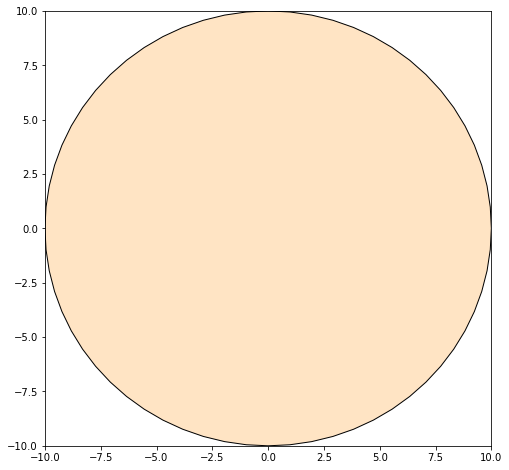

In [65]:
point = Point(0,0).buffer(10)
simpleDisplay(np.array([point.exterior.coords]))

1045516.1635153131 / 3136548.490545939


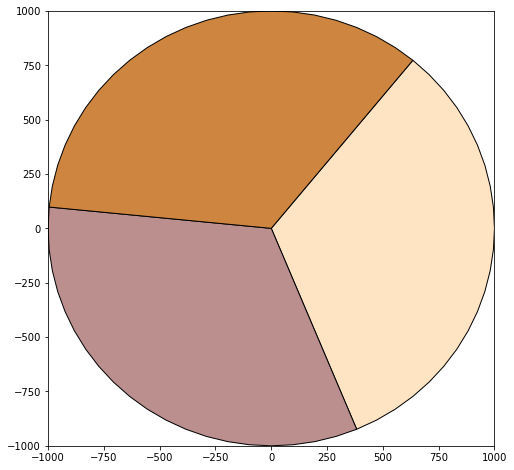

[ 0.921 -0.046 -0.594 -0.72  -0.151  0.757]


interactive(children=(FloatSlider(value=0.0, description='m', max=1.0, step=0.05), IntSlider(value=4000, descr…

In [66]:
point = np.array([Point(0,0).buffer(1000)])
## def design(Polygon, [directionVectors], pointsIndices, numberofParts)
circle = design(point, np.array([[1, 0],[ -1, -1],[-0.2, 1]]), [0, 22, 44], 3)
StudyMultipleMoving(circle)

In [67]:
print(circle
     )
np.save("circle20cm.npy", circle, allow_pickle = True)

[array([[ 634.393,  773.01 ],
       [ 380.636,  463.806],
       [ 225.968,  590.604],
       [  99.089,  436.002],
       [ 253.757,  309.204],
       [   0.   ,    0.   ],
       [ 153.073, -369.552],
       [ 337.849, -293.015],
       [ 414.386, -477.791],
       [ 229.61 , -554.328],
       [ 382.683, -923.88 ],
       [ 471.397, -881.921],
       [ 555.57 , -831.47 ],
       [ 634.393, -773.01 ],
       [ 707.107, -707.107],
       [ 773.01 , -634.393],
       [ 831.47 , -555.57 ],
       [ 881.921, -471.397],
       [ 923.88 , -382.683],
       [ 956.94 , -290.285],
       [ 980.785, -195.09 ],
       [ 995.185,  -98.017],
       [1000.   ,    0.   ],
       [ 995.185,   98.017],
       [ 980.785,  195.09 ],
       [ 956.94 ,  290.285],
       [ 923.88 ,  382.683],
       [ 881.921,  471.397],
       [ 831.47 ,  555.57 ],
       [ 773.01 ,  634.393],
       [ 707.107,  707.107]])
 array([[  382.683,  -923.88 ],
       [  229.61 ,  -554.328],
       [  414.386,  -477.791],
     

250.92387924367512 / 1254.6193962183756


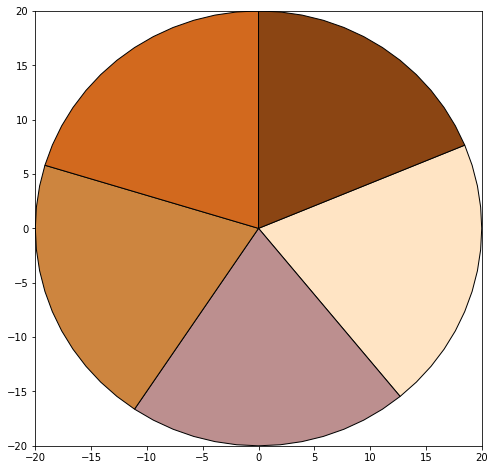

[ 2.916  0.15  -2.005 -2.584 -2.666 -0.603 -0.146  1.287  2.063  1.287]


interactive(children=(FloatSlider(value=0.0, description='m', max=1.0, step=0.05), IntSlider(value=4000, descr…

In [31]:
a = Point(0,0).buffer(20)
circle5Parts= design(np.array([a]),np.array([[1, 0],[-0.5, -1],[-1, 0.5], [-0.2, 1],[0.5, 2]]), [0,12,24,36,54], nParts = 5)
StudyMultipleMoving(circle5Parts, l=0)


In [36]:
np.save( "circle.npy", circle, allow_pickle=True)

## 4-part eight

In [ ]:
h1 = Point(0,-12).buffer(16)
h2 = Point(0,12).buffer(16)
eight = h1.union(h2)
hole1 = Point(0,12).buffer(6)
hole2 = Point(0,-12).buffer(6)
eightDesign = design(np.array([eight, hole1, hole2]),
                     np.array([[1,     -1],[ -0.5  ,  -1],[ -1  ,  1 ], [1,1]]), [0,25,50,75], nParts = 4)
StudyMultipleMoving(eightDesign)



# https://gist.github.com/pv/8036995

# puzzle 2d design

In [ ]:
def randomStructure(nPoints):
    np.random.seed(8)
    # make up data points
    points = list(500*np.random.rand(12, 2))
    points.append([0,0])
    points.append([500,0])
    points.append([0,500])
    points.append([500,500])
    
    vor = Voronoi(points)

    regions, vertices = voronoi_finite_polygons_2d(vor)

    pts = MultiPoint([Point(i) for i in points])
    
    mask = pts.convex_hull
    new_vertices = []
    for region in regions:
        polygon = vertices[region]
        shape = list(polygon.shape)
        shape[0] += 1
        p = Polygon(np.append(polygon, polygon[0]).reshape(*shape)).intersection(mask)
        poly = np.array(list(zip(p.boundary.coords.xy[0][:-1], p.boundary.coords.xy[1][:-1])))
        new_vertices.append(poly)
        plt.fill(*zip(*poly), alpha=0.4)
    plt.plot(points[:,0], points[:,1], 'ko')
    plt.show()
    return regions, vertices

In [ ]:
a, b = randomStructure(8)
index = [6, 4, 3, 5]
for i in index:
    print(b[i])
    
np.array([b[i] for i in index])
simpleDisplay
print(a)


In [ ]:
def mapToNpArray(regions, vertices):
    myMap = []
    for i in range(len(regions)):
        temp = [vertices[j] for j in range(len(regions[i]))]
        myMap.append(np.asarray(temp))
    return np.array(myMap)

In [ ]:
a = (np.array([[253.67073494, 405.63902563],
[356.61177344, 280.43286361],
[513.59792774 ,374.09495392],
[290.50334159 ,472.1004617]]))
simpleDisplay(np.array([a]))

In [ ]:
def simple_voronoi(vor, lim=None):
    # Make Voronoi Diagram 
    fig = voronoi_plot_2d(vor, show_points=True, show_vertices=True)
    # Configure figure 
    fig.set_size_inches(5,5)
    plt.axis("equal")
    if lim:
        plt.xlim(*lim)
        plt.ylim(*lim)
    plt.show()
simple_voronoi(a, lim=(0,500))

In [ ]:
def gridS(nPoints):
    listofPoints = 500 * np.random.rand(nPoints, 2)
    listof = list([[0,0],[0,500],[500,500],[500,0]])
    listofPoints= list(listofPoints) + listof
    listofPoints=np.array(listofPoints)
    vor = Voronoi(listofPoints)
    voronoi_plot_2d(vor)
    plt.show()
    return vor
def getCycles(graph):
    cycles = nx.minimum_cycle_basis(graph)
    finalCycles = [cycles[0]]
    append = True
    for i in range(len(cycles)): 
        append = True
        for j in range(len(finalCycles)):
            if (intersection(cycles[i], finalCycles[j])!= []):
                append=False        
        if(append and cycles[i] not in finalCycles ):
            finalCycles.append(cycles[i])
    return finalCycles  

In [ ]:
def aug(a):
    return a+1

In [ ]:
baseGrid = [([shy.Polygon([(i,j),(i+1, j),(i+1,j+1),(i,j+1)]) for i in range(4) for j in range(4)])]
baseGridArr =700* np.array([([(i,j),(i+1, j),(i+1,j+1),(i,j+1)]) for i in range(4) for j in range(4)])
a = 

In [ ]:
StudyMultipleMoving(baseGridArr)

In [ ]:
def isNeighboorsOf(shape1, shape2):
    #simpleDisplay(np.array([shape1,shape2]))
    for i in range(len(shape1)):
        for j in range(len(shape2)):
            if(isTouching(shape1[i],shape1[(i+1)%len(shape1)],shape2[j],shape2[(j+1)%len(shape2)])):
                return True
    return False
def generateGridGraph(grid):
    G = nx.Graph()
    for i in range(len(grid)):
        G.add_node(i)
    for i in range(len(grid)):
        for j in range(len(grid)):
            if(i!=j and isNeighboorsOf(grid[i],grid[j])):
                G.add_edge(i,j)
                G.add_edge(j,i)
    return G


In [ ]:
graph = generateGridGraph(baseGridArr)

In [ ]:
nx.draw(graph, with_labels=True, font_weight='bold')
print(type(nx.minimum_cycle_basis(graph)))


In [ ]:
gridDesign(baseGridArr)

In [ ]:
def designJoint2parts(p1,p2, width, height, distance_to_center=0.5 ):
    
    p1 = np.asarray(p1)
    p2 = np.asarray(p2)

    nrows, ncols = p1.shape
    dtype={'names':['f{}'.format(i) for i in range(ncols)],
           'formats':ncols * [p1.dtype]}

    C = np.intersect1d(p1.view(dtype), p2.view(dtype))

    commonPoint = C.view(p1.dtype).reshape(-1, ncols) 
    JointAxis = np.asarray((commonPoint[1]-commonPoint[0])/np.linalg.norm(commonPoint[1]-commonPoint[0]))
    v = np.array(JointAxis[1],-JointAxis[0])
    

    midPoint = np.asarray((commonPoint[0]+commonPoint[1])*distance_to_center)
    
    polyJoint = shy.Polygon([(midPoint+ JointAxis*width), (midPoint + JointAxis*width + height*v),(midPoint - JointAxis*width + height*v),(midPoint - JointAxis*width ),(midPoint - JointAxis*width - height*v),(midPoint + JointAxis*width - height*v)])
    p1 = shy.Polygon(p1).difference(polyJoint)
    p2 = shy.Polygon(p2).union(polyJoint)
    
    return list(p1.exterior.coords), list(p2.exterior.coords)

In [ ]:
def designJointsPieces(nPartPiece, nParts = 4):
    parts = nPartPiece[0]
    normals = compute_normals_dict(parts)
    print(normals)
    for i in range(nParts):
        parts[i], parts[(i+1)%len(parts)] = designJoint2(parts[i], parts[(i+1)%len(parts)],  directions[(i+1)%len(parts)], width, height, distance_to_center=0.5, center= [0,0] )


        
        parts[i] = list(parts[i].exterior.coords)
        
    for i in range(len(parts)):
        parts[i] = correctPoints(parts[i]) 
    return 0

In [ ]:
def gridDesign(grid):
    graph = generateGridGraph(grid)
    cycles = getCycles(graph)
    groupsOfPieces = []
    for i in range(len(cycles)):
        temp = []
        for j in range(len(cycles[i])):
            temp.append(grid[cycles[i][j]])
        groupsOfPieces.append(temp)
    groupsOfPieces = np.array(groupsOfPieces)
    
    p1 , p2 = designJoint2parts(groupsOfPieces[0][0],groupsOfPieces[0][1], 100, 100, distance_to_center=0.5 )
    parts = groupsOfPieces[0]

    
    a,b= designJoint2parts(parts[0],parts[1], 100, 100, distance_to_center=0.5 )

    
    
    
    simpleDisplay(np.array([a,b]))
    
    return 0

# Polygon <-> grid function

In [44]:
def createPieceFromPolygons(Ai):
    boundary = gpd.GeoSeries(cascaded_union(Ai))
    #boundary.plot(color = 'red')
    #plt.show()
    return boundary

def getCoordFromPolygon(polygon):
    d=shy.mapping(polygon)
    return (list(d.get('features')[0].get('geometry').get('coordinates')))

def getPolygonFromCoord(array):
    poly= [shy.Polygon(array[i]) for i in range(len(array))]
    return createPieceFromPolygons(poly)

def createPieceFromGrid(grid):
    grid = getCoordFromPolygon(getPolygonFromCoord(grid))
    grid = np.flip(grid, 1)
    grid = np.squeeze(grid,axis=0)
    return grid

[ 0.000e+00 -1.002e+00  1.002e+00 -0.000e+00  2.003e+00 -1.002e+00
  1.002e+00 -2.003e+00  2.002e+00  1.001e+00  3.003e+00  2.002e+00
  4.005e+00  1.000e+00  3.004e+00 -1.000e-03  2.003e+00 -3.005e+00
  3.005e+00 -2.003e+00  4.006e+00 -3.004e+00  3.004e+00 -4.006e+00
  4.006e+00 -1.002e+00  5.006e+00 -2.000e-03  6.007e+00 -1.002e+00
  5.006e+00 -2.003e+00]


interactive(children=(FloatSlider(value=0.0, description='i', max=1000.0, step=10.0), Output()), _dom_classes=…

In [82]:
StudyMultipleMoving(randomArray, k=10)

[-4.587  0.198 -3.489  1.296 -2.217  0.024 -3.315 -1.074 -2.208  2.577
  0.39   6.041  2.164  3.676 -0.754  1.487 -1.031 -3.359  0.067 -2.26
  1.286 -3.479  0.187 -4.577  1.53  -0.798  3.719  2.121  5.335 -0.033
  2.922 -1.842]


interactive(children=(FloatSlider(value=0.0, description='m', max=10.0, step=0.2), IntSlider(value=4000, descr…

In [84]:
StudyMultipleMoving(better)

[-4.406e+00 -1.166e+00 -3.067e+00  1.740e-01 -1.770e+00 -1.123e+00
 -3.110e+00 -2.462e+00 -3.067e+00  2.058e+00  4.110e-01  6.694e+00
  2.318e+00  4.152e+00 -1.770e+00  1.086e+00 -1.334e+00 -4.238e+00
  6.000e-03 -2.898e+00  1.240e+00 -4.133e+00 -1.000e-01 -5.472e+00
  1.776e+00  1.086e+00  4.076e+00  4.152e+00  5.683e+00  2.009e+00
  3.114e+00  8.300e-02]


interactive(children=(FloatSlider(value=0.0, description='m', max=10.0, step=0.2), IntSlider(value=4000, descr…

In [86]:
test = np.array([[[0,0],[10,0], [10,4], [11,3], [11,4,], [10,5], [10,10],[5,10], [5,9], [4,9], [4,10], [0,10]]])

In [87]:
test = np.array([[[0,0],[10,0], [10,4], [11,3], [11,4,], [10,5], [10,10],[5,10], [5,9], [4,9], [4,10], [0,10]],
                [[10,0], [20,0], [20,10], [15, 10], [16,11], [15, 11], [14, 10], [10,10], [10,5], [11,4], [11,3], [10,4]],
                [[20, 10], [20,20], [10,20], [10, 15], [11,15], [11,14], [10, 14],[10, 10], [14,10], [15,11], [16,11],[15,10]]
                ,[[10,10], [10,14], [11,14], [11,15],[10,15], [10,20], [0,20], [0,10], [4, 10], [4,9], [5,9], [5,10]]
                
                ])

In [ ]:
StudyMultipleMoving(pp[4:8])